### Assignment 2

~ Aminder Kaur

##### Aim:

 Analysing the data ,developing top insights and building a machine learning model to predict which customer will subscribe to Halfway there service , a cross selling promotion

##### Importing Packages

In [2]:
import random            as rand                     # random number gen
import pandas            as pd # data science essentials
import numpy as np
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler # standard scaler
from six import StringIO# saves objects in memory
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus# interprets dot objects
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm



file = "Apprentice_Chef_Dataset.xlsx"
df = pd.read_excel(io=file)
df.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,...,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,...,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,...,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,...,0,8,0,0,84.8,1,1,3,12,205


In [3]:
#for plotting the important features 
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    

Here the y variable is the cross_sell_success

In [4]:
#getting to know our datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

In [5]:
#to get to know the summary statistics of our data
df.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,...,1.486125,2.970709,0.355087,0.113052,150.556578,4.437307,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,...,2.318599,2.744598,0.478663,0.316738,49.447180,1.549666,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,33.400000,1.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,...,3.000000,4.000000,1.000000,0.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,...,9.000000,19.000000,1.000000,1.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


In [6]:
#for checking any null values in the dataset 
df.isnull().sum(axis=0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

#### Feature Engineering

In [7]:
# for the missing values of the data in family name 
fill = "Unknown"
df['FAMILY_NAME'] = df['FAMILY_NAME'].fillna(fill)

In [8]:
#checking for anyy null values in the datafrme 
df.isnull().any().any()

False

##### Feature Engineering of the object variable

In [9]:
# STEP 1: splitting personal emails

# placeholder list
email_lst = []

# looping over each email address
for index, col in df.iterrows():
    
    # splitting email domain at '@'
    split_email = df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    email_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(email_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [10]:
# renaming column to concatenate
email_df.columns = ['0', 'email_domain']


# concatenating personal_email_domain with df
df = pd.concat([df, email_df['email_domain']],
                   axis = 1)

In [11]:
# email domain types as given in the case study 
personal_email = ['@gmail.com', '@yahoo.com','@protonmail.com']
junk_email  = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']
prof_email =['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com','@cisco.com',
              '@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org','@goldmansacs.com','@homedepot.com',
              '@ibm.com','@intel.com','@jnj.com','@jpmorgan.com','@mcdonalds.com','@merck.com','@microsoft.com',
              '@nike.com','@pfizer.com','@pg.com','@travelers.com','@unitedtech.com','@unitedhealth.com',
              '@verizon.com','@visa.com','@walmart.com']

# placeholder list
email_lst = []


# looping to group observations by domain type
for domain in df['email_domain']:
    
    if '@' + domain in personal_email:
        email_lst.append('personal')
        

    elif '@' + domain in junk_email:
        email_lst.append('junk')
        
    elif '@' + domain in prof_email:
        email_lst.append('professional')


    else:
            print('Unknown')


# concatenating with original DataFrame
df['domain_group'] = pd.Series(email_lst)


# checking results
df['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [12]:
#for counting the number of words in the name of the person 
name_len =[]
for names in df['NAME']:
    name_len.append(len(names))
df['name_len'] = pd.Series(name_len)  

##### One hot encoding 

In [13]:
#doing one hot encoding on the domain group 
hot_email_domain      = pd.get_dummies(df['domain_group'])
df = df.drop('domain_group', axis = 1)
df = pd.concat([df,hot_email_domain],axis=1)

##### Outlier detection

From the below visualisation i can see all the boxplot and can detect the outliers in each columns  and we will also know their skewnwss

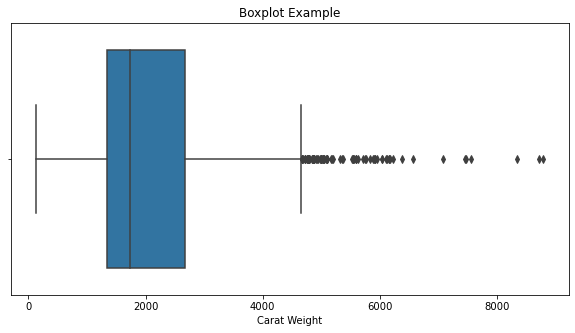

In [14]:
fig, ax = plt.subplots(figsize = (10, 5))


# developing a boxplot for Revenue
sns.boxplot(x      = 'REVENUE',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot Example')
plt.xlabel(xlabel = 'Carat Weight')
plt.show()

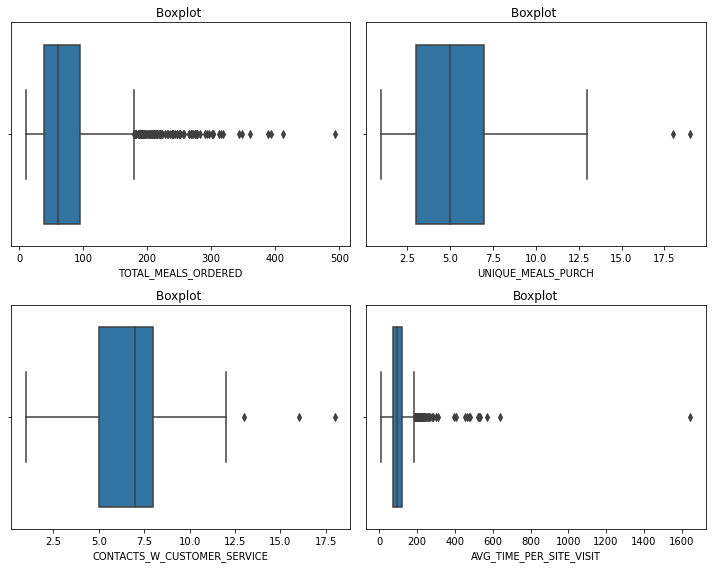

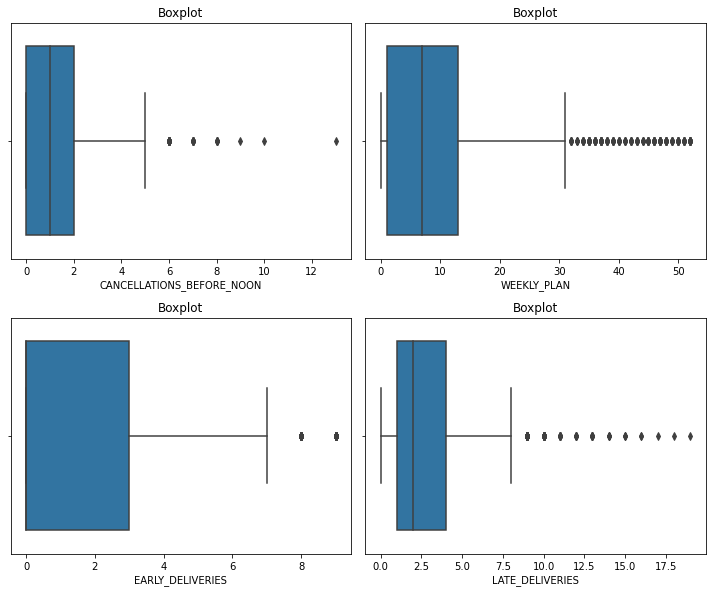

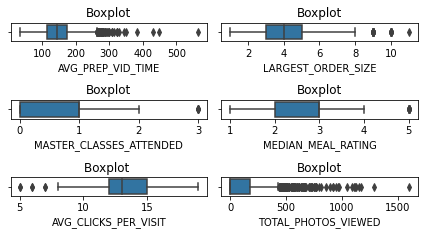

In [15]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.boxplot(x      = 'TOTAL_MEALS_ORDERED',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot ')
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.boxplot(x      = 'UNIQUE_MEALS_PURCH',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot ')
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.boxplot(x      = 'CONTACTS_W_CUSTOMER_SERVICE',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot ')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.boxplot(x      = 'AVG_TIME_PER_SITE_VISIT',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot')
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()

plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.boxplot(x      = 'CANCELLATIONS_BEFORE_NOON',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot')
plt.xlabel(xlabel = 'CANCELLATIONS_BEFORE_NOON')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.boxplot(x      = 'WEEKLY_PLAN',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot')
plt.xlabel(xlabel = 'WEEKLY_PLAN')

########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.boxplot(x      = 'EARLY_DELIVERIES',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot')
plt.xlabel(xlabel = 'EARLY_DELIVERIES')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.boxplot(x      = 'LATE_DELIVERIES',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot')
plt.xlabel(xlabel = 'LATE_DELIVERIES')

########################
plt.tight_layout()
plt.show()

# developing a scatterplot
plt.subplot(4, 2, 1)
sns.boxplot(x      = 'AVG_PREP_VID_TIME',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot')
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')


plt.subplot(4, 2, 2)
sns.boxplot(x      = 'LARGEST_ORDER_SIZE',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot')
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')

#################

plt.subplot(4, 2, 3)
sns.boxplot(x      = 'MASTER_CLASSES_ATTENDED',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot')
plt.xlabel(xlabel = 'MASTER_CLASSES_ATTENDED')

################
plt.subplot(4, 2, 4)
sns.boxplot(x      = 'MEDIAN_MEAL_RATING',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')

#############

plt.subplot(4, 2, 5)
sns.boxplot(x      = 'AVG_CLICKS_PER_VISIT',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot ')
plt.xlabel(xlabel = 'AVG_CLICKS_PER_VISIT')

##################

plt.subplot(4, 2, 6)
sns.boxplot(x      = 'TOTAL_PHOTOS_VIEWED',  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = df) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = 'Boxplot')
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()




In [16]:
### outlier threshold
# setting threshold
tmeals_thres = 190.00
umeals_thres = 13
contwcust_thres =12
avgtime_thres = 200
cancelbnoon_thres = 5
weekplan_thres = 31
earlydel_thres = 7
latedel_thres = 8
avgprep_thres = 260
largord_thres = 8
mastercl_thress = 2
medrate_thres = 4

avgclck_thres = 18
totpic_thres = 410
reve_thres = 4500

df['out_tmeals'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'TOTAL_MEALS_ORDERED'] > tmeals_thres: 
        # changing outlier flag
        df.loc[ index , 'out_tmeals'] = 1
        



########################
df['out_umeals'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'UNIQUE_MEALS_PURCH'] > umeals_thres: 
        # changing outlier flag
        df.loc[ index , 'out_umeals'] = 1
        



######################
df['out_contwcust'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'CONTACTS_W_CUSTOMER_SERVICE'] > contwcust_thres: 
        # changing outlier flag
        df.loc[ index , 'out_contwcust'] = 1
        




##############
df['out_avgtime'] = 0

# looping over one column to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'AVG_TIME_PER_SITE_VISIT'] > avgtime_thres: 
        # changing outlier flag
        df.loc[ index , 'out_avgtime'] = 1
        



####################
df['out_cancelbnoon'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'CANCELLATIONS_BEFORE_NOON'] > cancelbnoon_thres: 
        # changing outlier flag
        df.loc[ index , 'out_cancelbnoon'] = 1
        



#####################
df['out_weekplan'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'WEEKLY_PLAN'] > weekplan_thres: 
        # changing outlier flag
        df.loc[ index , 'out_weekplan'] = 1
        




########################
df['out_earlydel'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'EARLY_DELIVERIES'] > earlydel_thres: 
        # changing outlier flag
        df.loc[ index , 'out_earlydel'] = 1
        




###################
df['out_latedel'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'LATE_DELIVERIES'] > latedel_thres: 
        # changing outlier flag
        df.loc[ index , 'out_latedel'] = 1
        




####################
df['out_avgprep'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'AVG_PREP_VID_TIME'] > avgprep_thres: 
        # changing outlier flag
        df.loc[ index , 'out_avgprep'] = 1
        




#######################
df['out_largord'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'LARGEST_ORDER_SIZE'] > largord_thres: 
        # changing outlier flag
        df.loc[ index , 'out_largord'] = 1
        




#####################
df['out_mastercl'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'MASTER_CLASSES_ATTENDED'] > mastercl_thress: 
        # changing outlier flag
        df.loc[ index , 'out_mastercl'] = 1
        




########################
df['out_medrate'] = 0

# looping over one column to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'MEDIAN_MEAL_RATING'] > medrate_thres: 
        # changing outlier flag
        df.loc[ index , 'out_medrate'] = 1
        



########################
df['out_avgclck'] = 0

# looping over one column to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'AVG_CLICKS_PER_VISIT'] > avgclck_thres : 
        # changing outlier flag
        df.loc[ index , 'out_avgclck'] = 1
        




##############
df['out_totpic'] = 0

# looping over one column to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'TOTAL_PHOTOS_VIEWED'] > totpic_thres: 
        # changing outlier flag
        df.loc[ index , 'out_totpic'] = 1
        

################
df['out_revenue'] = 0

# looping over one column  to change another 
for index, meals in df.loc[ : , : ].iterrows():

    # setting conditional 
    if df.loc[ index , 'REVENUE'] > reve_thres: 
        # changing outlier flag
        df.loc[ index , 'out_revenue'] = 1







##### Log transformation

In [17]:
#those variables that were skewed are transformed
df['log_REVENUE'] = np.log10(df['REVENUE'])
df['n_MEDIAN_MEAL_RATING'] = np.log10(df['MEDIAN_MEAL_RATING'])
df['n_LARGEST_ORDER_SIZE'] = np.log10(df['LARGEST_ORDER_SIZE'])
df['n_CONTACTS_W_CUSTOMER_SERVICEl'] = np.log10(df['CONTACTS_W_CUSTOMER_SERVICE'])
df['n_UNIQUE_MEALS_PURCH'] = np.log10(df['UNIQUE_MEALS_PURCH'])

##### Creating new variables

In [18]:
df['Total_locker'] = df['PACKAGE_LOCKER'] + df['REFRIGERATED_LOCKER']


In [19]:
df['avgprepfor_uniquemeal'] = df['AVG_PREP_VID_TIME'] + df['UNIQUE_MEALS_PURCH']


In [20]:
df['rev_per_meal'] = df['REVENUE'] / df['TOTAL_MEALS_ORDERED']


In [21]:
#finding the correlation between all the variables with reapect to cross sell success 
df_corr = df.corr(method='pearson').round(decimals=2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS                1.00
professional                      0.19
name_len                          0.18
CANCELLATIONS_BEFORE_NOON         0.16
MOBILE_NUMBER                     0.10
TASTES_AND_PREFERENCES            0.08
REFRIGERATED_LOCKER               0.07
Total_locker                      0.06
out_cancelbnoon                   0.06
out_avgprep                       0.05
n_CONTACTS_W_CUSTOMER_SERVICEl    0.05
personal                          0.04
CONTACTS_W_CUSTOMER_SERVICE       0.04
MASTER_CLASSES_ATTENDED           0.04
PACKAGE_LOCKER                    0.04
PC_LOGINS                         0.04
AVG_PREP_VID_TIME                 0.03
out_medrate                       0.03
n_LARGEST_ORDER_SIZE              0.03
MEDIAN_MEAL_RATING                0.03
n_MEDIAN_MEAL_RATING              0.03
avgprepfor_uniquemeal             0.03
out_latedel                       0.02
out_earlydel                      0.02
LARGEST_ORDER_SIZE                0.02
EARLY_DELIVERIES         

#### train_test_split

In [22]:
# declaring the x and y variables for train test split
x_data = df.drop(['CROSS_SELL_SUCCESS','NAME' , 'EMAIL', 'FIRST_NAME' ,'FAMILY_NAME','email_domain'],
                 axis = 1)
y_target = df.loc[:,'CROSS_SELL_SUCCESS']

In [23]:
## train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = y_target)


# merging training data for statsmodels
df_train = pd.concat([x_train, y_train], axis = 1)

##### Logistic Regression

In [24]:
# instantiating a logistic regression model object
logistic_new = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                          
                                         MOBILE_NUMBER + 
                                         CANCELLATIONS_BEFORE_NOON +
                                         TASTES_AND_PREFERENCES + 
                                         PC_LOGINS + 
                                         out_tmeals + 
                                         out_earlydel + 
                                        
                                         out_avgprep + 
                                         
                                         out_mastercl  +
                                          out_avgclck
                                         
                                          
                                           """ , 
                                         data    = df_train)


# fitting the model object
results_new = logistic_new.fit()


# checking the results SUMMARY
results_new.summary()

Optimization terminated successfully.
         Current function value: 0.591412
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1449
Method:                           MLE   Df Model:                            9
Date:                Tue, 26 Jan 2021   Pseudo R-squ.:                 0.05820
Time:                        15:09:53   Log-Likelihood:                -862.87
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 7.071e-19
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -1.6554      0.593     -2.791      0.005      -2.818      -0.493
MOBILE_NUMBER                 0.6729      0.169      3.991      0.000       0.342       1.003
CANCELLATIONS_BEFORE_NOON     0.2595      0.044      5.833      0.000       0.172       0.347
TASTES_AND_PREFERENCES        0.3625      0.127      2.849      0.004       0.113       0.612
PC_LOGINS                     0.2237      0.101      2.208      0.027       0.025       0.422
out_tmeals                   -0.7303      0.276     -2.649      0.008      -1.271      -0.190
out_earlydel                  0.6571      0.325      2.023      0.043       0.020       1.294
out_avgprep                   1.9229      0.553      3.475      0.001       0.838       3.007
out_mastercl                 -2.1874      0.974     -2.245      0.025      -4.097      -0.278
out_avgclck                  -2.6687      1.064     -2.508      0.012      -4.754      -0.583
=============================================================================================
"""

In [25]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_data, y_target)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy
print(logreg_train_score-logreg_test_score)
logreg_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = logreg_pred).round(4) # auc

Training ACCURACY: 0.7087
Testing  ACCURACY: 0.7105
-0.0018000000000000238


/Users/aminderpalkaur/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 28
False Positives: 128
False Negatives: 13
True Positives : 318



##### Decision trees

full tree nothing pruned

In [27]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_data, y_target)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 1.0
Full Tree Testing ACCURACY : 1.0
Full Tree AUC Score: 1.0


In [28]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 156
False Positives: 0
False Negatives: 0
True Positives : 331



In [29]:
#cresting dictionaries of all columns so as to put in train test data 
candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE','TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
       'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
 

 # significant variables only (set 1)
 'logit_sig_1'    : ['REVENUE',  'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
       'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'junk',
       'personal', 'professional', 'out_tmeals', 'out_umeals', 'out_contwcust',
       'out_avgtime', 'out_cancelbnoon', 'out_weekplan', 'out_earlydel',
       'out_latedel', 'out_avgprep', 'out_largord', 'out_mastercl',
       'out_medrate', 'out_avgclck', 'out_totpic', 'out_revenue',
       'log_REVENUE', 'n_MEDIAN_MEAL_RATING', 'n_LARGEST_ORDER_SIZE',
       'n_CONTACTS_W_CUSTOMER_SERVICEl', 'n_UNIQUE_MEALS_PURCH',
       'Total_locker', 'avgprepfor_uniquemeal', 'rev_per_meal'],


 # significant variables only (set 2)
 'logit_sig_2'  :  ['REVENUE','MOBILE_LOGINS', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES',
                  'PC_LOGINS', 'EARLY_DELIVERIES', 'personal','LATE_DELIVERIES','REFRIGERATED_LOCKER', 
                   'professional', 'out_cancelbnoon', 'CANCELLATIONS_AFTER_NOON', 
                  'name_len'],
    
    # significant variables only (set 3)
 'logit_sig_3'  : ['REVENUE',   'TOTAL_MEALS_ORDERED',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT',  'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
        'AVG_PREP_VID_TIME',
       'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'junk',
       'personal', 'professional', 'out_tmeals', 'out_umeals', 'out_contwcust',
       'out_avgtime', 'out_weekplan', 'out_earlydel',
       'out_avgprep', 'out_largord', 'out_mastercl',
       'out_medrate', 'out_avgclck', 'out_totpic', 'out_revenue',
       'log_REVENUE', 'n_MEDIAN_MEAL_RATING', 'n_LARGEST_ORDER_SIZE',
       'n_CONTACTS_W_CUSTOMER_SERVICEl', 'n_UNIQUE_MEALS_PURCH',
       'Total_locker', 'avgprepfor_uniquemeal', 'rev_per_meal','name_len'],
   
    # significant variables only (set 4)
 'logit_sig_4'    : ['REVENUE',  'TOTAL_MEALS_ORDERED', 
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
        'AVG_PREP_VID_TIME',
       'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT',  
       'personal', 'professional', 'out_tmeals', 'out_umeals', 'out_contwcust',
       'out_avgtime', 'out_cancelbnoon', 'out_weekplan', 'out_earlydel',
       'out_latedel', 'out_avgprep', 'out_largord', 'out_mastercl',
       'out_medrate', 'out_avgclck', 'out_totpic', 'out_revenue',
       'log_REVENUE', 'n_MEDIAN_MEAL_RATING', 'n_LARGEST_ORDER_SIZE',
       'n_CONTACTS_W_CUSTOMER_SERVICEl', 'n_UNIQUE_MEALS_PURCH',
       'Total_locker', 'avgprepfor_uniquemeal', 'rev_per_meal','name_len'],
    
    
}


##### logit half set 

###### Train test split

In [30]:
# train/test split with the logit_sig variables
log_data   =  df.loc[:,candidate_dict['logit_sig_3']]
log_target =  df.loc[:,'CROSS_SELL_SUCCESS']


# train/test split
X_train, X_test, y_train, y_test = train_test_split(
            log_data,
            log_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = log_target)

In [31]:
# INSTANTIATING a logistic regression model with tuned values

tree_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_leaf=4, random_state=219)
tree_tuned_fit = tree_tuned.fit(log_data, log_target)


# PREDICTING based on the testing set
tree_tuned_pred =tree_tuned_fit.predict(X_test)



# SCORING the results

print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                  y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(X_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc


# saving scoring data for future use




# saving the AUC score


Training ACCURACY: 0.7498
Testing  ACCURACY: 0.7721
AUC Score        : 0.6951


In [32]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 75
False Positives: 81
False Negatives: 30
True Positives : 301



In [33]:
def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    export     : bool, defalut False
        whether or not to export the tree as a .png file
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img

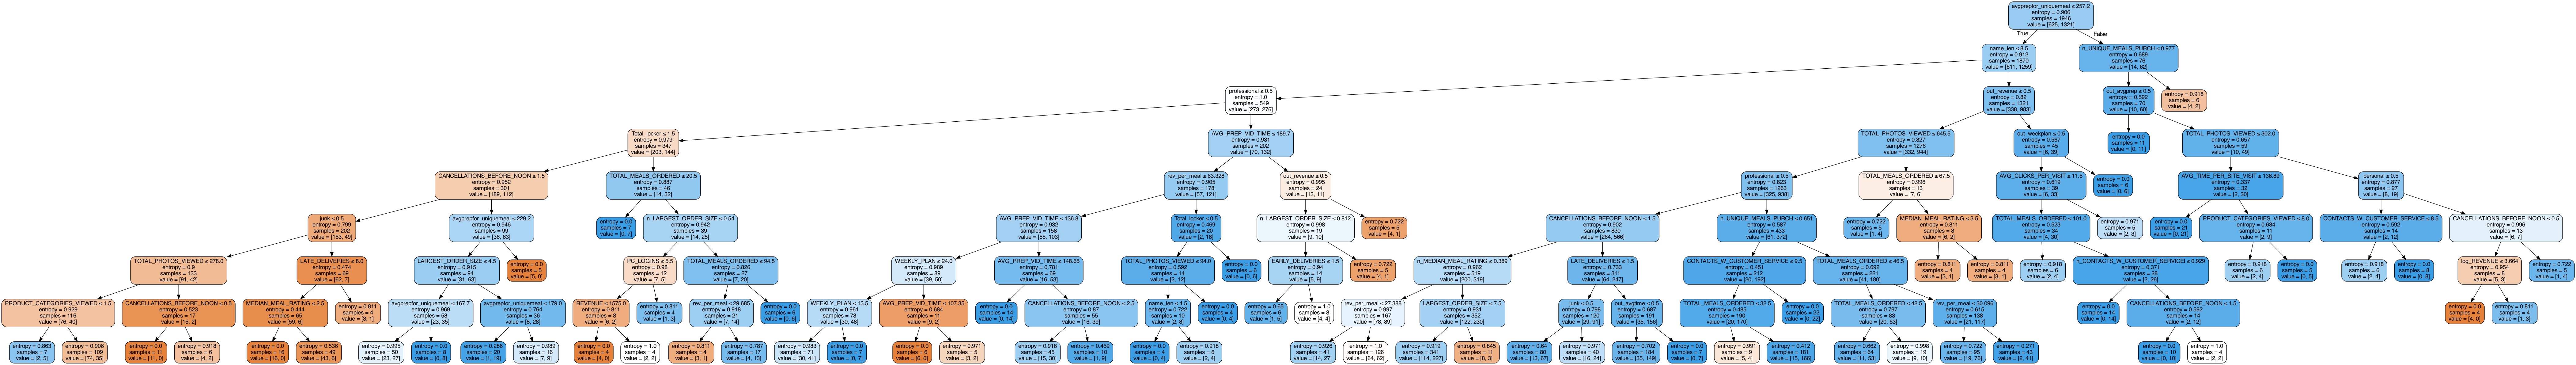

In [34]:
# displaying the tree

display_tree(tree       = tree_tuned,
             feature_df = X_train)


<ipython-input-3-12f280ff4a9e>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


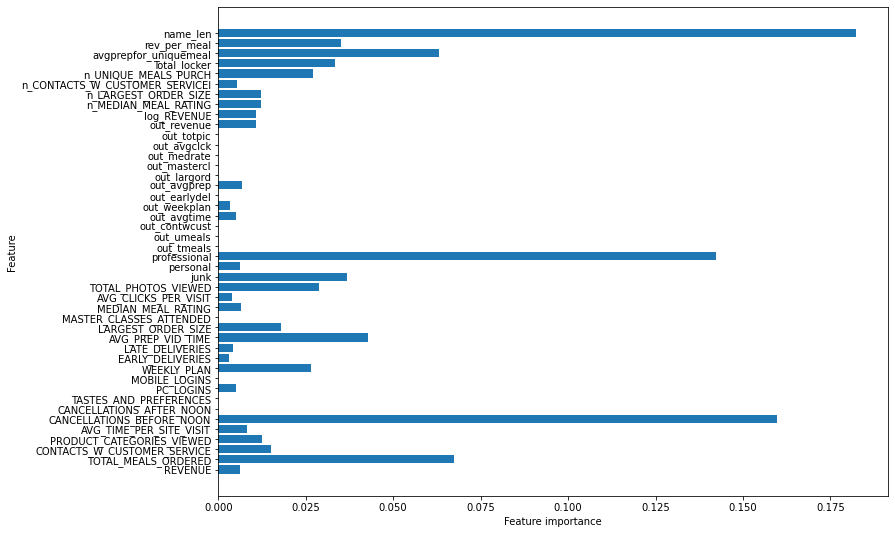

In [35]:
plot_feature_importances(tree_tuned_fit,
                         train = X_train,
                         export = False)

##### full Random Forest

In [36]:
forest_tuned = RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=350,
                       random_state=219, warm_start=True)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(log_data, log_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(X_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(X_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(X_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(X_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 1.0
Forest Tuned Testing  ACCURACY: 1.0
Forest Tuned AUC Score        : 1.0


<ipython-input-3-12f280ff4a9e>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


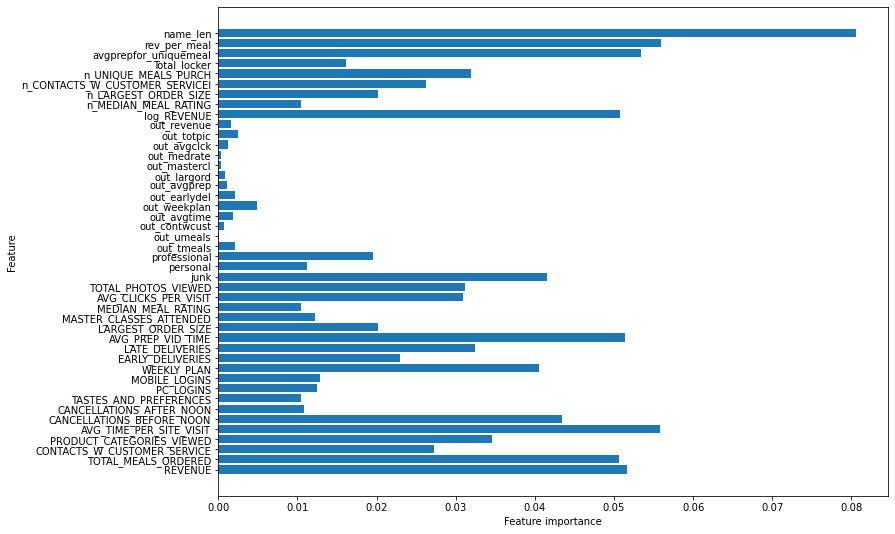

In [37]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = X_train,
                         export = False)

In [38]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 156
False Positives: 0
False Negatives: 0
True Positives : 331



##### GBM 

In [39]:
#full gbm
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 4,
                                              warm_start    = False,
                                              random_state  = 219)


full_gbm_default_fit = full_gbm_default.fit(log_data, log_target)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

train_glm_sco =full_gbm_default_fit.score(X_train, y_train).round(4)
test_glm_sco =full_gbm_default_fit.score(X_test, y_test).round(4)
glm_auc =roc_auc_score(y_true  = y_test,
            y_score = full_gbm_default_pred).round(4)

Training ACCURACY: 0.8725
Testing ACCURACY : 0.8973
AUC Score        : 0.855


In [40]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 115
False Positives: 41
False Negatives: 9
True Positives : 322



<ipython-input-3-12f280ff4a9e>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


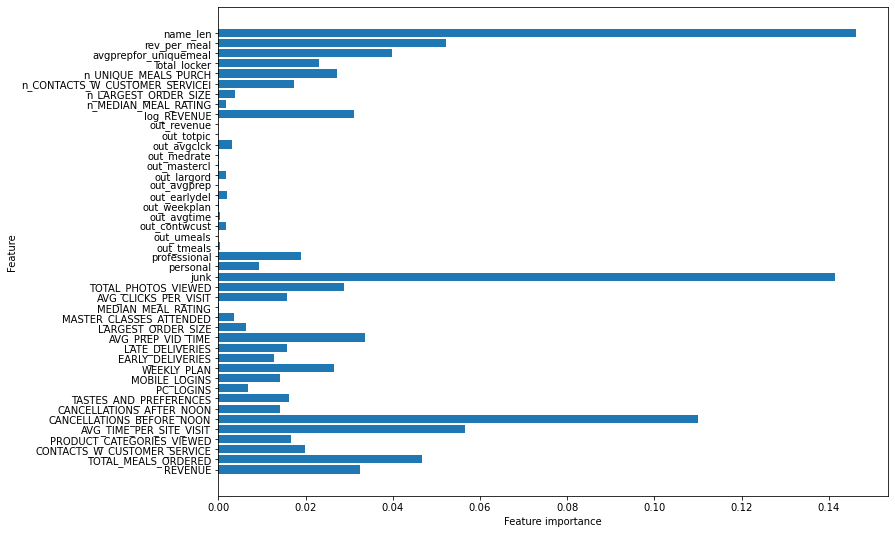

In [41]:
plot_feature_importances(full_gbm_default_fit,
                         train = X_train,
                         export = False)

#####  tuned gbm - best model 

In [55]:
#hyperparameter tining gbm
gbm_tuned = GradientBoostingClassifier(learning_rate=0.30000000000000004, max_depth=2,
                           n_estimators=175)# unpacking the confusion matrix


# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(log_data, log_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))
                                       
tuned_gbm_train =gbm_tuned_fit.score(X_train, y_train).round(4)
tuned_gbm_test = gbm_tuned_fit.score(X_test, y_test).round(4)
tuned_gbm_auc =roc_auc_score(y_true  = y_test,y_score = gbm_tuned_pred).round(4)

Training ACCURACY: 0.8821
Testing  ACCURACY: 0.8871
AUC Score        : 0.8424


In [56]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 112
False Positives: 44
False Negatives: 11
True Positives : 320



<ipython-input-3-12f280ff4a9e>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


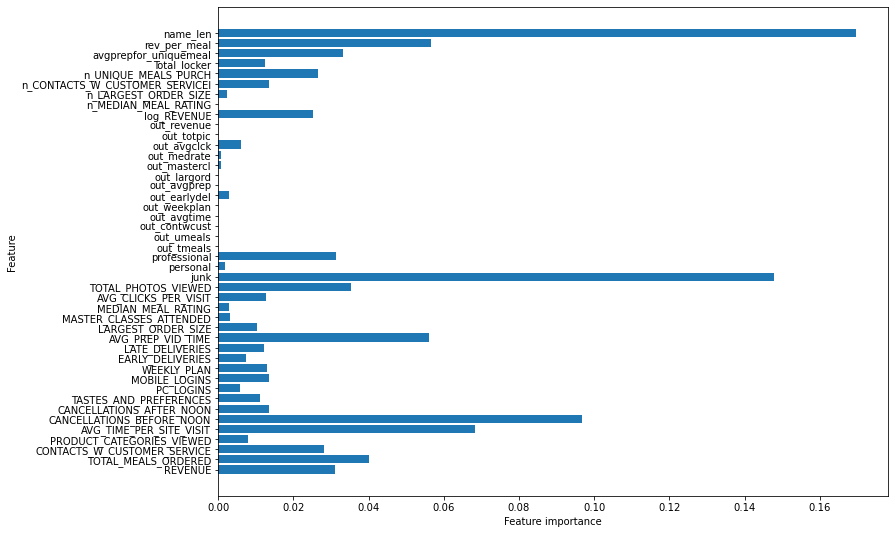

In [58]:
plot_feature_importances(gbm_tuned_fit,
                         train = X_train,
                         export = False)

##### Model Performances

In [57]:
model_performance = {
    
    'Model Name'    : ['Logistic', ' Tree', 'Random Forest', 'Tuned GBM'],
           
    'AUC Score' : [logreg_auc_score, tree_tuned_auc, forest_tuned_auc, tuned_gbm_auc],
    
    'Training Accuracy' : [logreg_train_score, tree_tuned_train_score,
                           forest_tuned_train_score, tuned_gbm_train],
           
    'Testing Accuracy'  : [logreg_test_score, tree_tuned_train_score,
                           forest_tuned_test_score, tuned_gbm_test],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                           (tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp),
                           (gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)




model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.5701,0.7087,0.7105,"(28, 128, 13, 318)"
1,Tree,0.6951,0.7498,0.7498,"(75, 81, 30, 301)"
2,Random Forest,1.0000,1.0000,1.0000,"(156, 0, 0, 331)"
3,Tuned GBM,0.8424,0.8821,0.8871,"(112, 44, 11, 320)"


##### Conclusion :



Hence the best model is GBM with auc score of 0.8424  and with less training testing gap .